# Esercitazione 8 - Variational Monte Carlo e Ottimizzazione

## Calcolo di un upper bound per energia del GS

Il principio variazionale applicato alla meccanica quantistica permette di stimare un limite superiore all'energia di ground state di un sistema quantistico, infatti:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 = \frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}.
$$

E' possibile sfruttare quanto utilizzato nelle precedenti esercitazioni per calcolare l'integrale sopra, in particolar modo l'algoritmo di Metropolis per campionare dalla densità di probabilità associata alla funzione d'onda del sistema, con il quale poi stimare l'integrale con metodo Monte Carlo.

Più in dettaglio, moltiplicando e dividendo l'espressione sopra per una $\Psi_T(x)$ si ottiene:
$$
\langle {\hat H} \rangle_T  = \frac{1}{\int dx |\Psi_T(x)|^2}
\int dx {\color{red}|\Psi_T(x)|^2} {\color{blue} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}}
$$
dove il prefattore di normalizzazione viene assorbito dalla procedura di campionamento (Metropolis), la parte evidenziata in rosso è la densità di probabilità, la parte in blu è la nuova funzione di cui si vuole calcolare il valor medio.  
Come nell'esercitazione $2$ a questo punto si può calcolare il valor medio come:
$$
\langle {\hat H} \rangle_T \ \approx \frac{1}{N} \sum_i^L {\color{blue}g(x_i) }
$$
con $L$ numero di estrazioni dalla densità di probabilità e $g(x)$ coincide con la funzione in blu scritta sopra valutata nei punti $x$ estratti dalla densità di probabilità.

## Ex 8.01

Nella presente esercitazione si considera il sistema unidimensionale descritto dall'hamiltoniana (posti $\hbar = m = 1$):
$$
{\hat H} = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right)
$$
con
$$
V(x) = x^4 - \frac{5}{2}x^2.
$$
A questo punto è necessario calcolare analiticamente la funzione in blu scritta sopra in maniera tale da poterci poi fare calcoli espliciti, che risulta essere:
$$
{ \color{blue} g(x) = \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \dfrac{1}{2\sigma^2} \left[1 - \dfrac{\left[ \left(\dfrac{x-\mu}{\sigma}\right)^2 \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}} + \left(\dfrac{x+\mu}{\sigma}\right)^2 \cdot e^{-\frac{(x+\mu)^2}{2\sigma^2}} \right]}{\Psi_T(x)} \right] +V(x) }
$$
dove viene considerata la funzione di prova $\Psi_T^{\mu , \sigma}$ dipendente da due parametri $\mu$ e $\sigma$:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}.
$$
Di nuovo, utilizzando nella procedura l'algoritmo di Metropolis, non è necessario conoscere la normalizzazione di tale funzione d'onda che si semplifica nel calcolo. Infatti:
$$
\frac{{\hat H} (C \Psi_T)}{C \Psi_T} = \frac{ {\hat H} \Psi_T}{\Psi_T} 
$$

Si è proceduto quindi valutando il valore medio per l'energia degli stati $\Psi_T(x)^{\mu , \sigma}$ cercando nello spazio dei parametri $\mu , \sigma$, quale coppia di valori desse il valore minore. 

*E' importante a questo punto notare come, per le motivazioni già esposte nell'esercitazione $5$, il valore ideale del passo $S$ da utilizzare come ampiezza dello step nell'algoritmo di Metropolis sia quello che restituisce un valore di aspettazione pari al $50\%$ dopo la fase di equilibrazione. Tale valore di $S$ è diverso per scelte diverse dei parametri, e va pertanto tunato volta per volta*.

Riassumendo la procedura utilizzata è la seguente:
* Scegliere una coppia di parametri $\mu, \sigma$
* Trovare il valore di $S$ per avere accettazione pari a $50\%$
* Utilizzare l'algoritmo di Metropolis per campionare $M$ valori dalla densità di probabilità $|\Psi|^2$, dopo aver equilibrato il sistema con un numero sufficiente di steps ($\sim 10^4$)
* A partire dagli $M$ punti $x_i$ estratti, calcolare il valore della funzione $g(x)$ in quei punti.
* Fare un block averaging con i risultati trovati, dove il valore medio dell'energia è calcolato su ciascun blocco contenente ciascuno $L$ estrazioni.
* Ripetere la procedura con altre coppie di parametri.

Analizzando l'intervallo di parametri $\mu$ e $\sigma$ in $[0, 1.2] \times [0, 1.2]$ il codice appena descritto produce dei risultati del valore medio dell'Hamiltoniana aventi questa forma:

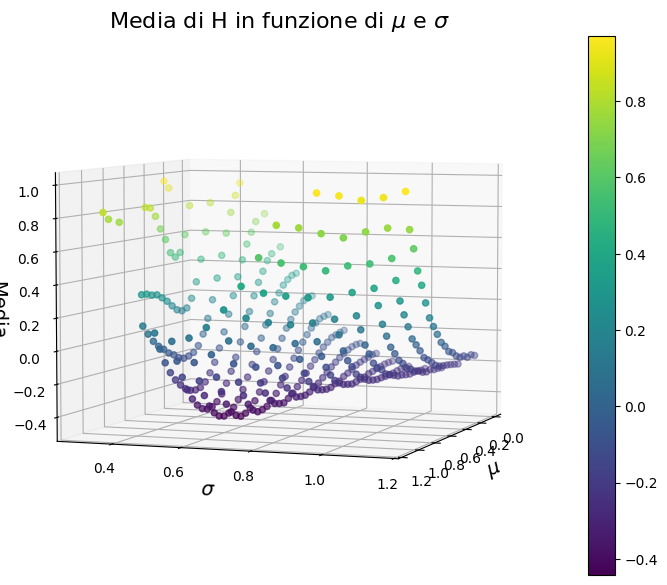

Mu e sigma che danno la media minima (-0.442488):
Mu: 0.8
Sigma: 0.6


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Carica i dati dal file .dat
mu, sigma, media = np.loadtxt("Ex8_cpp/g(x)_mu_sigma.dat", unpack=True, skiprows=1, usecols=(0,1,2))

# Filtro per escludere i dati con media > 1
mask = media <= 1
mu_filtered = mu[mask]
sigma_filtered = sigma[mask]
media_filtered = media[mask]

# Crea la figura per il plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Crea il grafico 3D con i dati filtrati
scatter = ax.scatter(mu_filtered, sigma_filtered, media_filtered, c=media_filtered, cmap=cm.viridis, marker='o')

# Etichette e titolo
ax.set_xlabel(r'$\mu$', fontsize=14)
ax.set_ylabel(r'$\sigma$', fontsize=14)
ax.set_zlabel(r'Media', fontsize=14)
ax.set_title(r'Media di H in funzione di $\mu $ e $\sigma$', fontsize=16)

# Mostra la barra dei colori
fig.colorbar(scatter)

ax.view_init(elev=5, azim=20)

# Mostra il plot
plt.show()

# Trova l'indice della media minima
min_media_index = np.argmin(media_filtered)

# Estrai mu e sigma che corrispondono alla media minima
mu_min = mu_filtered[min_media_index]
sigma_min = sigma_filtered[min_media_index]
min_media = media_filtered[min_media_index]

# Stampa i risultati
print(f"Mu e sigma che danno la media minima ({min_media}):")
print(f"Mu: {mu_min}")
print(f"Sigma: {sigma_min}")

# Ex 8.02 - Simulated Annealing (SA)

In questo punto dell'esercitazione viene implementato l'algoritmo del Simulated Annealing (SA) e ne si studia il comportamento applicato all'ottimizzazione della funzione descritta al punto precedente.

L'algoritmo SA prende spunto dalla fisica statistica ed in particolare dalla descrizione della configurazione degli atomi interni ad un metallo. Ad alte temperature $T$ gli atomi tendono a disporsi in maniera disordinata, abbassando $T$ in maniera graduale gli atomi tendono a stabilizzarsi in una configurazione cristallina di minima energia $E$.

A partire da quest'idea si costruisce un algoritmo che tenda a minimizzare una funzione costo $L$ (analoga dell'energia $E$), riducendo contemporaneamente la flessibilità del sistema (ovvero la possibilità di assumere temporaneamente configurazioni di energia più sfavorevoli.  
Nell'algoritmo dunque:
* $S$ è lo spazio dei parametri da cui dipende la funzione costo.
* $L$ è la funzione costo da minimizzare.
* $T$ è la temperatura fittizia, funge da **parametro di controllo della flessibilità del sistema**: quando la $T$ è alta è possibile per il sistema fare transizioni su stati meno energeticamente favorevoli, quando la $T$ è prossima a $0$ sono ammesse transizioni soltanto verso stati ad energia minore.

Infatti il **passo fondamentale** (step) dell'algoritmo SA, posta una $T>0$, consiste nel proporre una nuova configurazione $s' \in S$ a partire da una configurazione $s \in S$ t.c. $s' = s + \delta$ e accettarla con probabilità:
$$
P_{\text{acc}}(s \rightarrow s') = 
\begin{cases}
1 & \text{se } L(s') \leq L(s) \\
\exp\left(-\dfrac{L(s') - L(s)}{T}\right) & \text{se } L(s') > L(s)
\end{cases}
$$.

In questo modo le transizioni ad energia minore sono sempre accettate, mentre le transizioni verso energie maggiori vengono accettate con una certa probabilità non nulla per $T>0$. Questo comportamento si implementa analogamente a quanto fatto nelle esercitazioni precedenti: si calcola la probabilità di transizione $P_{\text{acc}}$, si estrae poi un numero uniformemente dall'intervallo $[0,1]$, se quest'ultimo è minore di $P_{\text{acc}}$, la transizione è accettata, altrimenti è respinta e $s' = s$.

Lo schema dell'algoritmo è dunque il seguente:
1. Iniziallizzare con una $s_0$ ed una $T_0$ ragionevoli (temperatura sufficientemente alta per esplorare ampiamente lo spazio delle soluzioni)
2. Ripetere $M$ steps ($M = 200$) con la temperatura $T_k$ fissata, in questo modo si ottiene una sequenza di parametri $s$ che tendono a minimizzare la funzione costo per quella temperatura. 
3. Abbassare la temperatura: $T_{k+1} = \alpha T_k$, selezionando un $\alpha < 1$ non troppo piccolo per non diminuire la temperatura in maniera troppo repentina.
4. Tornare al punto 2. e ripetere fino a quando non si giunge ad una $T$ sufficientemente bassa ($T \sim 10^{-6}$).

***NB: partire da una $T>0$ conferisce all'algoritmo una certa stocasticità che gli permette di uscire da punti di minimo locale. Abbassando gradualmente la temperatura, l'algoritmo tende a stabilizzarsi e a perdere stocasticità via via che si avvicina al minimo globale.***

Note aggiuntive:
* $\delta$ assume un valore decrescente man mano che si abbassa la temperatura, questo per ridurre ulteriormente il rumore dei risultati per l'energia media. Si pone in ogni caso un valore minimo di $\delta = 0.001$ per non congelare eccessivamente l'algoritmo.


Di seguito si mostra il percorso nello spazio dei parametri al variare della temperatura (per ogni valore di temperatura $T_k$ viene riportata l'ultima coppia di parametri $\mu$ e $\sigma$ dopo $M$ steps effettuati a quella temperatura fissata). Sulla base dell'analisi precedente, si è scelto di porre come valori iniziali dei parametri $\mu_0 = 0.5$ e $\sigma = 0.7$, ed una temperatura iniziale $T_0 = 0.12$ che tiene conto della scala dei valori di energia.

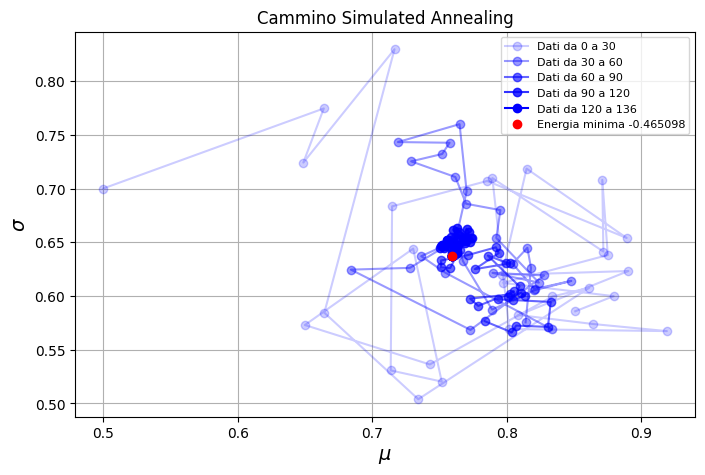

La minima energia pari a:  -0.465098  è ottenuta per mu =  0.759039  e sigma =  0.63765


In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma, energy, err_energy, T, S  = np.loadtxt("Ex8_cpp/Sim_Anneal_path.dat", unpack=True, skiprows=1)

plt.figure(figsize = (8, 5))
plt.title(r'Cammino Simulated Annealing')
plt.xlabel(r'$\mu$', fontsize=14)
plt.ylabel(r'$\sigma$', fontsize=14)

#Opacità crescente man manno che il cammino procede
dim_gruppo = 30
n_gruppi = int(np.ceil(len(mu) / dim_gruppo))

for k in range(n_gruppi):
    start = k * dim_gruppo
    end = min(start + dim_gruppo, len(mu))
    opacity = (k + 1) / n_gruppi
    plt.plot(mu[start:end], sigma[start:end], marker='o', linestyle='-', color='blue', alpha=opacity, label=f'Dati da {start} a {end}')

min_index = np.argmin(energy)

plt.plot(mu[min_index], sigma[min_index], 'o', color='red', label=f"Energia minima {energy[min_index]}")
plt.grid(True)
plt.legend(loc='upper right', fontsize=8)
plt.show()
mu_opt = mu[min_index]
sigma_opt = sigma[min_index]
print("La minima energia pari a: ", energy[min_index], " è ottenuta per mu = ", mu[min_index], " e sigma = ", sigma[min_index])
    

Come si può osservare l'algoritmo sonda lo spazio dei parametri d'apprima in maniera più flessibile, poi focalizzandosi sulla porzione di spazio vicino al minimo. Come coppia di parametri ottimali viene considerato infine il valore "best so far", ovvero la coppia che durante il percorso ha dato l'energia più bassa e non l'ultima coppia di parametri a temperatura più bassa. 

Si osservi inoltre nel grafico seguente l'andamento dell'energia al diminuire della temperatura:

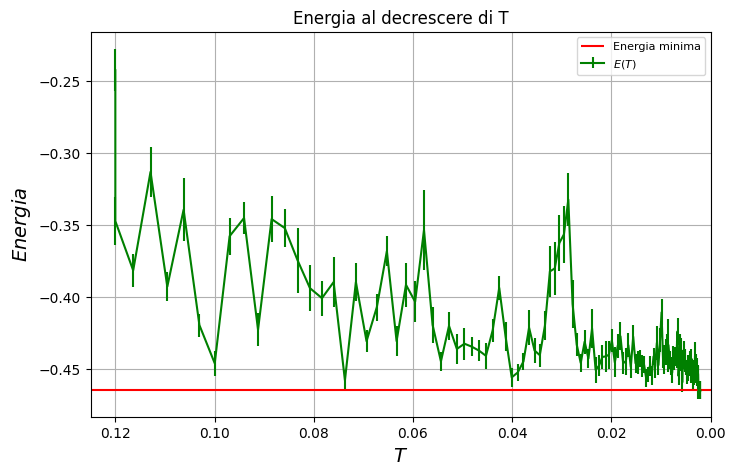

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma, energy, err_energy, T, S = np.loadtxt("Ex8_cpp/Sim_Anneal_path.dat", unpack=True, skiprows=1)

plt.figure(figsize = (8, 5))
plt.title(r'Energia al decrescere di T')
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$Energia$', fontsize=14)
plt.xlim(0.125,0.0)

plt.errorbar(T, energy, err_energy, color='green', label='$E(T)$')

min_index = np.argmin(energy)

plt.hlines(energy[min_index], 0., 0.125, color='red', label="Energia minima")
plt.grid(True)
plt.legend(loc='upper right', fontsize=8)

plt.show()

Si può apprezzare una diminuzione dell'energia sul lungo periodo, con un carattere oscillatorio e instabile su piccole scale di variazione della temperatura. Anche in questo caso si può osservare come il valore di energia minima non si ottenga per forza alla temperatura più bassa.

Presa la coppia di parametri ottimali trovati, si procede ora con il consueto data blocking dei valori di energia corrispondenti.

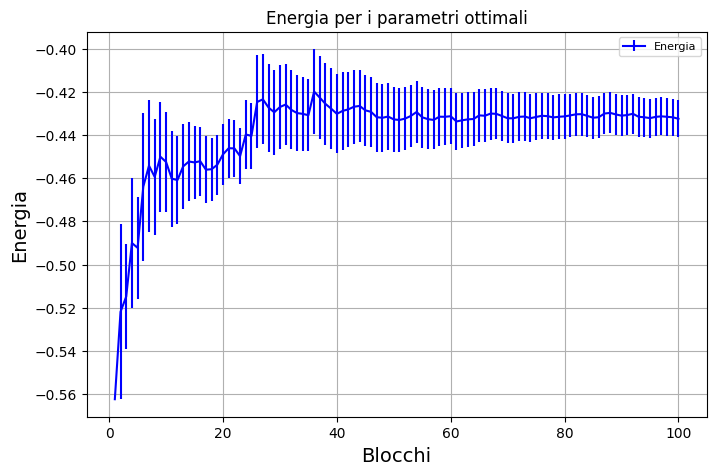

In [5]:
import numpy as np
import matplotlib.pyplot as plt

ave, err_ave = np.loadtxt("Ex8_cpp/Energy_optimal.dat", unpack=True, skiprows=1)

N = np.arange(1, len(ave)+1)

plt.figure(figsize = (8, 5))
plt.title(r'Energia per i parametri ottimali')
plt.xlabel(r'Blocchi', fontsize=14)
plt.ylabel(r'Energia', fontsize=14)

plt.errorbar(N, ave, err_ave, color='blue', label='Energia')


plt.grid(True)
plt.legend(loc='upper right', fontsize=8)

plt.show()

*Nota: il valore di energia minima a cui tende il grafico appena mostrato non corrisponde a quanto si osserva nei grafici sopra per la stessa coppia di parametri. Ciò è dovuto al fatto che il valore calcolato sopra è stato trovato con un particolare set Montecarlo.*

Trasformando l'equazione di Schroedinger in una equazione matriciale si ottengono i seguenti risultati per la funzione d'onda $|\Psi_T|^2$ che si vogliono confrontare con quanto trovato numericamente e con l'espressione analitica. La visualizzazione grafica dei risultati numerici può essere implementata mediante un istogramma, che rappresentando il numero di estrazioni in diversi sottointervalli dell'asse x, si identifica con la densità di probabilità quando la larghezza dei sottointervalli tende a zero. L'istogramma è stato riempito con $10^7$ estrazioni.


Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331760998
2nd excited state energy:  1.971733134393021


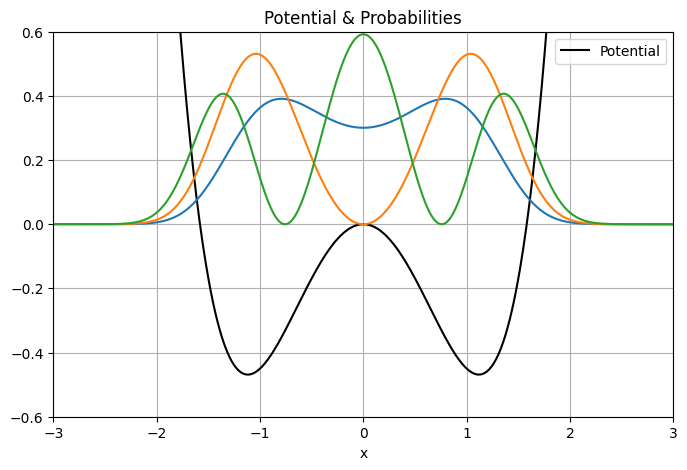

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

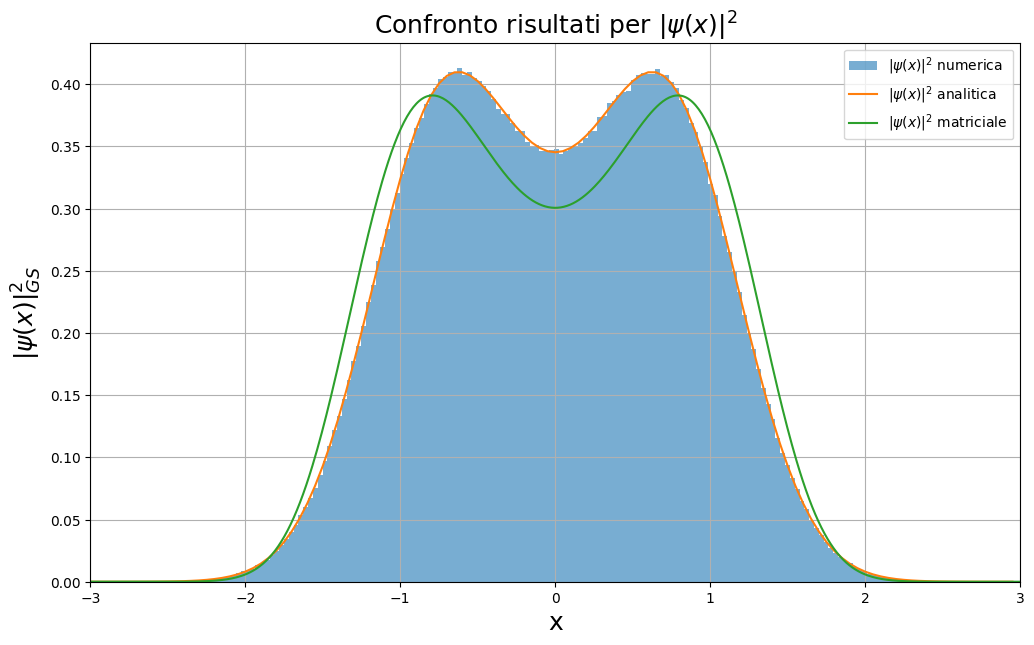

In [7]:
psi_num = np.loadtxt("Ex8_cpp/Psi_sampled.dat", unpack='true')
x_range = np.arange(-3, 3, step=0.05)


def psi2_an(x, mu , sigma):
    exp1 = np.exp(-0.5*((x-mu)/sigma)**2)
    exp2 = np.exp(-0.5*((x+mu)/sigma)**2)
    norm = 2*np.sqrt(np.pi)*sigma*(1+np.exp(-(mu/sigma)**2)) 
    return (exp1 + exp2)**2/norm

fig = plt.figure(figsize = (12,7))
plt.title(r"Confronto risultati per $|\psi(x)|^2$", size = 18)

plt.hist(psi_num, 200, density='true', alpha=0.6, label=r"$|\psi(x)|^2$ numerica")
plt.plot(x_range, psi2_an(x_range, mu_opt, sigma_opt), label=r"$|\psi(x)|^2$ analitica")
plt.plot(x, (psi[0])**2, label = r"$|\psi(x)|^2$ matriciale")
plt.legend()

plt.xlim(-3,3)

plt.grid(True)
plt.ylabel(r"$|\psi(x)|^2_{GS}$" , size = 18)
plt.xlabel(r"x", size = 18)

plt.show()

I campionamenti trovati con l'algoritmo Monte Carlo riproducono bene la soluzione analitica di test, fissati i parametri $\mu$ e $\sigma$, entrambi i risultati si scostano però dalla soluzione matriciale che meglio si avvicina al risultato reale.